# 项目一

In [61]:
import matplotlib.payplot as plt
import matplotlib as mpl
import pandas as pd
#基于 matplotlib 的库 提供了更高级的接口
import seaborn as sns
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr

ImportError: No module named payplot

In [62]:
# 载入数据 dataframe
df = pd.read_csv('challenge_dataset.txt', names=['X','Y'])

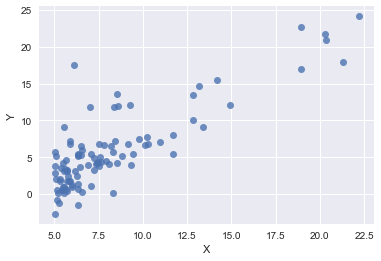

In [63]:
%matplotlib inline

sns.regplot(x='X', y='Y', data=df, fit_reg=False)
plt.show()

In [64]:
X_train, X_test, y_train, y_test = np.asarray(tts(df['X'], df['Y'], test_size=0.1))

In [65]:
# classification
clf = lr()
clf.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

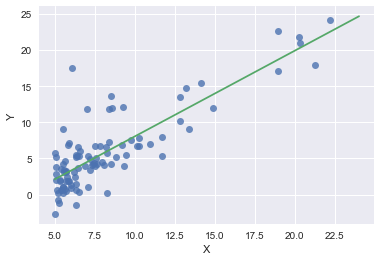

In [66]:
# 绘制训练结果
x_line = np.arange(5,25).reshape(-1,1)
sns.regplot(x=df['X'], y=df['Y'], data=df, fit_reg=False)
plt.plot(x_line, clf.predict(x_line))
plt.show()

# 项目二

In [67]:
co2_df = pd.read_csv('global_co2.csv')
temp_df = pd.read_csv('annual_temp.csv')

In [68]:
co2_df = co2_df.ix[:,:2]
co2_df = co2_df.ix[co2_df['Year'] >= 1960] 
co2_df.columns=['Year','CO2']  
co2_df = co2_df.reset_index(drop=True)    

In [69]:
temp_df = temp_df[temp_df.Source != 'GISTEMP']      
temp_df.drop('Source', inplace=True, axis=1)
temp_df = temp_df.reindex(index=temp_df.index[::-1])
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]
temp_df.columns=['Year','Temperature']                                      # Rename columns
temp_df = temp_df.reset_index(drop=True)

In [70]:
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)

In [71]:
climate_change_df.head()

,Year,CO2,Temperature
0,1960,2569,0.0252
1,1961,2580,0.0818
2,1962,2686,0.0924
3,1963,2833,0.1100
4,1964,2995,-0.1461


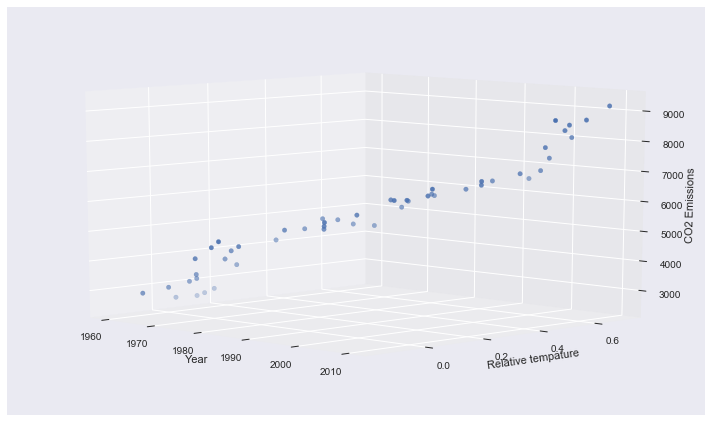

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

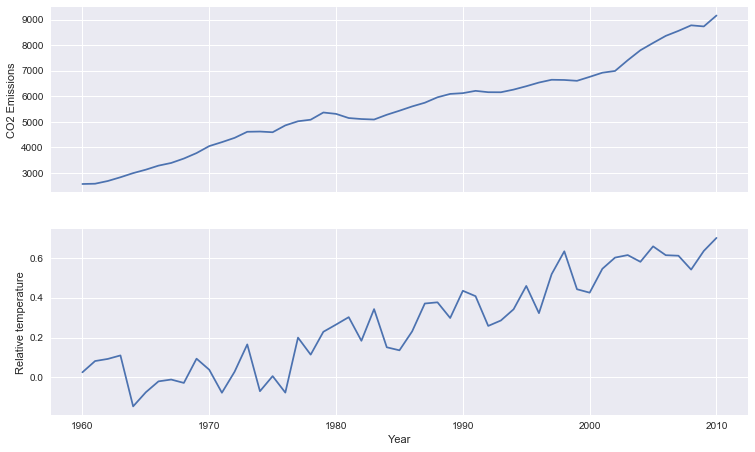

In [74]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

In [81]:
X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

X_train, X_test, y_train, y_test = np.asarray(tts(X, Y, test_size=0.1))

In [82]:
clf = lr()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
print('Score: ', clf.score(X_test.reshape(-1, 1), y_test))

('Score: ', 0.97622994650372386)


In [84]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

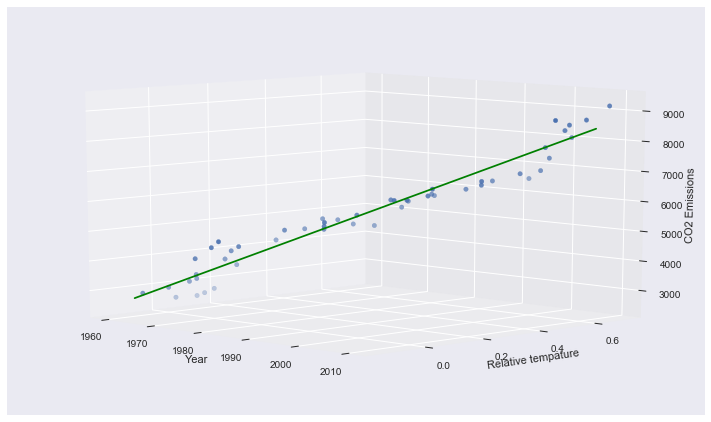

In [95]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)

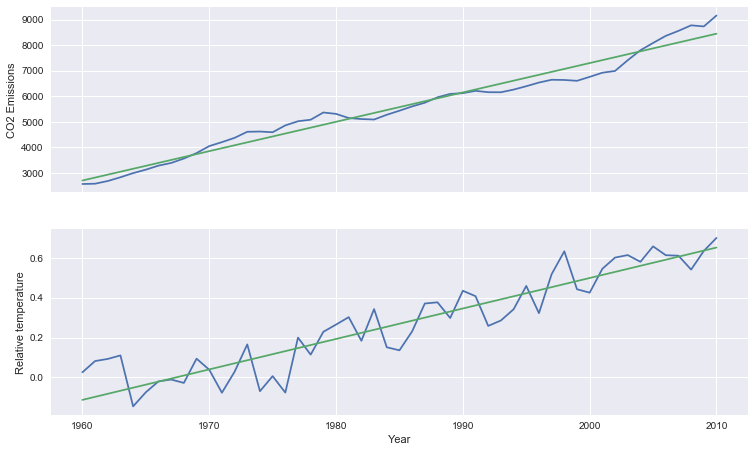

In [96]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')